In [1]:
import sys
sys.path.append('..')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Data Paths

In [3]:
path_clinical_jan23 = Path("/home/fabian/projects/phd/ai_radiation_therapy/data_preprocessed/Gesamtliste - retrospektive Kohorte RCTx - EFS angepasst 08.01.2022.xlsx")
df = pd.read_excel(path_clinical_jan23)

In [5]:
df.keys()

Index(['name', 'id', 'birthday', 'age', 'sex', 'height', 'weight', 'scanDate',
       'injDose', 'scanpi', 'siteIndex', 'siteName', 'sampleIndex',
       'sampleName', 'chemoIndex', 'chemoName', 'surgery', 'appDose', 'tstage',
       'nstage', 'uicc', 'grade', 'ebv', 'hpv', 'timeOS', 'statOS', 'timeLRC',
       'statLRC', 'timeDM', 'statDM', 'timeEFS', 'statEFS', 'lkDel', 'vol',
       'volAll', 'volLK', 'max', 'maxAll', 'maxLK', 'mean', 'meanAll',
       'meanLK', 'peak', 'peakAll', 'peakLK', 'asp', 'aspAll', 'aspLK',
       'imageData', 'timeEFS12', 'statEFS12', 'timeEFS24', 'statEFS24',
       'timeEFS36', 'statEFS36', 'timeEFS48', 'statEFS48'],
      dtype='object')

Distribution of timeEFS


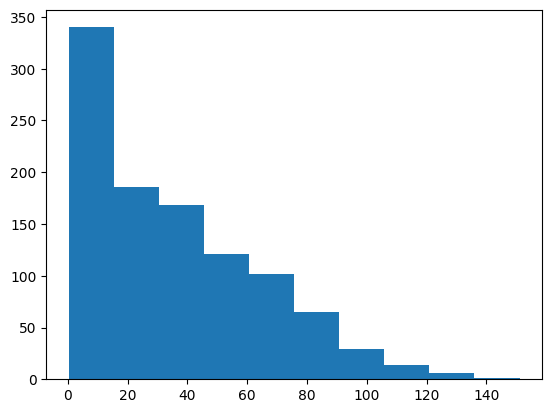

Distribution of timeEFS for patients with statEFS==0


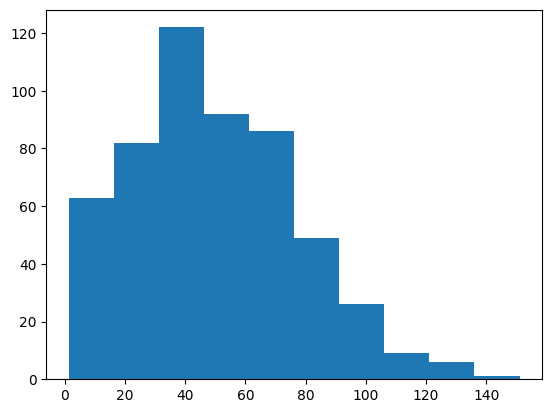

Distribution of timeEFS for patients with statEFS==1


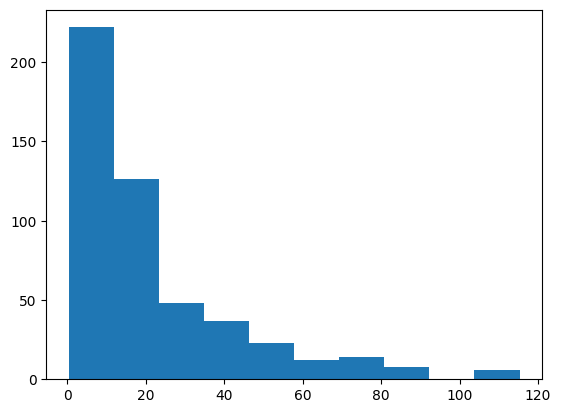

In [13]:
df.timeEFS.max()
print("Distribution of timeEFS")
plt.hist(df.timeEFS)
plt.show()
print("Distribution of timeEFS for patients with statEFS==0")
plt.hist(df[df.statEFS==0].timeEFS)
plt.show()
print("Distribution of timeEFS for patients with statEFS==1")
plt.hist(df[df.statEFS==1].timeEFS)
plt.show()


In [10]:
df.statEFS.mean()

0.4836223506743738

In [24]:
print(f"{(df[df.statEFS==0].timeEFS >= 36).mean():.2%} of patients with statEFS==0 have a timeEFS >= 36")
print(f"{(df[df.statEFS==1].timeEFS >= 36).mean():.2%} of patients with statEFS==1 have a timeEFS >= 36\n")

print(f"{(df[df.statEFS==0].timeEFS >= 48).mean():.2%} of patients with statEFS==0 have a timeEFS >= 48")
print(f"{(df[df.statEFS==1].timeEFS >= 48).mean():.2%} of patients with statEFS==1 have a timeEFS >= 48")

66.98% of patients with statEFS==0 have a timeEFS >= 36
19.32% of patients with statEFS==1 have a timeEFS >= 36

47.01% of patients with statEFS==0 have a timeEFS >= 48
11.55% of patients with statEFS==1 have a timeEFS >= 48


In [33]:
cut_off = 48
efs0 = (df[df.statEFS==0].timeEFS >= cut_off).sum()
efs1 = (df[df.statEFS==1].timeEFS < cut_off).sum()
print(f"A cut_off of {cut_off} would reduce from {len(df)} to {efs0 + efs1} patients ({efs0} EFS0 and {efs1} EFS1)")

cut_off = 36
efs0 = (df[df.statEFS==0].timeEFS >= cut_off).sum()
efs1 = (df[df.statEFS==1].timeEFS < cut_off).sum()
print(f"A cut_off of {cut_off} would reduce from {len(df)} to {efs0 + efs1} patients ({efs0} EFS0 and {efs1} EFS1)")

A cut_off of 48 would reduce from 1070 to 690 patients (252 EFS0 and 438 EFS1)
A cut_off of 36 would reduce from 1070 to 758 patients (359 EFS0 and 399 EFS1)


In [36]:
(df.timeOS == df.timeEFS).mean()
(df.timeOS == df.timeDM).mean()

0.6485981308411215

In [67]:
print(f"LRC recurrence if EFS1 and time > 36: {df[(df.statEFS==1) & (df.timeEFS >= 36)].statLRC.mean():.2%}")
print(f"DM occurrence if EFS1 and timeEFS>36: {df[(df.statEFS==1) & (df.timeEFS >= 36)].statDM.mean():.2%}\n")

# now for 48 instad of 36:
print(f"LRC recurrence if EFS1 and time > 48: {df[(df.statEFS==1) & (df.timeEFS >= 48)].statLRC.mean():.2%}")
print(f"DM occurrence if EFS1 and timeEFS>48: {df[(df.statEFS==1) & (df.timeEFS >= 48)].statDM.mean():.2%}\n")

# nor for <36:
print(f"LRC recurrence if EFS1 and time < 36: {df[(df.statEFS==1) & (df.timeEFS < 36)].statLRC.mean():.2%}")
print(f"DM occurrence if EFS1 and timeEFS<36: {df[(df.statEFS==1) & (df.timeEFS < 36)].statDM.mean():.2%}")

LRC recurrence if EFS1 and time > 36: 26.80%
DM occurrence if EFS1 and timeEFS>36: 14.43%

LRC recurrence if EFS1 and time > 48: 20.69%
DM occurrence if EFS1 and timeEFS>48: 12.07%

LRC recurrence if EFS1 and time < 36: 45.09%
DM occurrence if EFS1 and timeEFS<36: 32.21%


In [58]:
print(f"OS if EFS1 and LRC&DM are negative timeEFS>36: {df[(df.statEFS==1) & (df.timeEFS >= 36) & (df.statLRC==0) & (df.statDM==0)].statOS.mean():.2%}")


OS if EFS1 and LRC&DM are negative timeEFS>36: 100.00%


In [4]:
df.iloc[0]

,name,id,birthday,age,sex,height,weight,scanDate,injDose,scanpi,...,aspLK,imageData,timeEFS12,statEFS12,timeEFS24,statEFS24,timeEFS36,statEFS36,timeEFS48,statEFS48
0,HN-CHUM-001,HN-CHUM-001,1902-01-01,82,M,170.0,80.0,1995-07-31,617.8,109.4,...,22.675,cnn-canada/HN-CHUM-001_18850827,12.0,0.0,24.0,0.0,36.0,0.0,48.0,0.0
1,HN-CHUM-002,HN-CHUM-002,1902-01-01,73,M,170.0,55.0,1995-11-16,441.4,100.7,...,27.660,cnn-canada/HN-CHUM-002_18850827,12.0,0.0,19.0,1.0,19.0,1.0,19.0,1.0
2,HN-CHUM-003,HN-CHUM-003,1902-01-01,56,M,180.0,99.0,1995-12-14,338.8,106.4,...,14.144,cnn-canada/HN-CHUM-003_18850827,12.0,0.0,24.0,0.0,36.0,0.0,48.0,0.0
3,HN-CHUM-004,HN-CHUM-004,1902-01-01,62,M,177.0,76.0,1996-04-20,312.6,105.0,...,15.760,cnn-canada/HN-CHUM-004_18850827,12.0,0.0,24.0,0.0,36.0,0.0,48.0,0.0
4,HN-CHUM-005,HN-CHUM-005,1902-01-01,67,F,167.0,97.0,1996-09-22,392.9,131.8,...,20.438,cnn-canada/HN-CHUM-005_18850827,12.0,0.0,24.0,0.0,36.0,0.0,48.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,lmu-pet-ct-00226,lmu-pet-ct-0022,1963-01-01,47,M,190.0,80.0,2010-11-22,250.1,46.4,...,NaN,cnn-lmu/lmu-pet-ct-00226_20101122,7.0,1.0,7.0,1.0,7.0,1.0,7.0,1.0
1066,lmu-pet-ct-00227,lmu-pet-ct-0022,1947-01-01,57,M,NaN,66.0,2009-03-04,312.0,54.2,...,NaN,cnn-lmu/lmu-pet-ct-00227_20090304,12.0,0.0,24.0,0.0,36.0,0.0,37.2,1.0
1067,lmu-pet-ct-00228,lmu-pet-ct-0022,1952-01-01,58,F,162.0,77.0,2011-01-20,209.8,56.0,...,NaN,cnn-lmu/lmu-pet-ct-00228_20110120,12.0,0.0,24.0,0.0,36.0,0.0,48.0,0.0
1068,lmu-pet-ct-00229,lmu-pet-ct-0022,1955-01-01,57,M,180.0,80.0,2013-01-23,254.5,135.4,...,NaN,cnn-lmu/lmu-pet-ct-00229_20130123,12.0,0.0,24.0,0.0,36.0,0.0,48.0,0.0


In [66]:
df[(df.statEFS==1) & (df.statOS==1) & (df.statLRC==0) & (df.statDM==0)]


,name,id,birthday,age,sex,height,weight,scanDate,injDose,scanpi,...,aspLK,imageData,timeEFS12,statEFS12,timeEFS24,statEFS24,timeEFS36,statEFS36,timeEFS48,statEFS48
74,HN-CHUS-013,HN-CHUS-013,1902-01-01,58,M,NaN,102.0,2021-10-03,494.0,71.4,...,0.000,cnn-canada/HN-CHUS-013_18850827,12.0,0.0,24.0,0.0,36.0,0.0,48.0,0.0
83,HN-CHUS-022,HN-CHUS-022,1902-01-01,67,M,NaN,90.0,2021-10-03,346.0,89.4,...,0.000,cnn-canada/HN-CHUS-022_18850827,12.0,0.0,24.0,0.0,30.2,1.0,30.2,1.0
85,HN-CHUS-024,HN-CHUS-024,1902-01-01,59,M,NaN,68.0,2021-10-03,372.0,82.0,...,0.000,cnn-canada/HN-CHUS-024_18850827,12.0,0.0,24.0,0.0,36.0,0.0,48.0,0.0
86,HN-CHUS-025,HN-CHUS-025,1902-01-01,75,M,NaN,59.0,2021-10-03,222.0,85.3,...,0.000,cnn-canada/HN-CHUS-025_18850827,12.0,0.0,24.0,0.0,36.0,0.0,48.0,0.0
91,HN-CHUS-030,HN-CHUS-030,1902-01-01,77,M,NaN,74.0,2021-10-03,306.0,83.3,...,0.000,cnn-canada/HN-CHUS-030_18850827,12.0,0.0,24.0,0.0,36.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,lmu-pet-ct-00215,lmu-pet-ct-0021,1942-01-01,73,F,163.0,43.0,2015-07-09,218.6,70.8,...,NaN,cnn-lmu/lmu-pet-ct-00215_20150709,12.0,0.0,12.1,1.0,12.1,1.0,12.1,1.0
1057,lmu-pet-ct-00216,lmu-pet-ct-0021,1948-01-01,67,M,165.0,64.0,2016-01-12,NaN,24209820.0,...,10.765,cnn-lmu/lmu-pet-ct-00216_20160112,5.6,1.0,5.6,1.0,5.6,1.0,5.6,1.0
1059,lmu-pet-ct-00219,lmu-pet-ct-0021,1941-01-01,62,M,NaN,71.0,2008-09-24,346.0,73.3,...,NaN,cnn-lmu/lmu-pet-ct-00219_20080924,12.0,0.0,13.2,1.0,13.2,1.0,13.2,1.0
1063,lmu-pet-ct-00224,lmu-pet-ct-0022,1945-01-01,65,M,NaN,62.0,2010-10-28,224.0,40.8,...,0.000,cnn-lmu/lmu-pet-ct-00224_20101028,12.0,0.0,24.0,0.0,36.0,0.0,48.0,0.0


In [ ]:
df.timeLRC
df.timeDM
df.timeOS
df.timeEFS

In [26]:
(df[df.statEFS==1].timeEFS < 48).sum()

438

# Add cut-off info to df
Assume that EFS==0 is only really true for patients if timeEFS (time checked) is longer than X months (otherwise, if checked after e.g. 4 months only, there might be an event which hasn't been recorded (bad label))

The same is true for EFS==1 (ironically meaning not EFS). If there is an event, it should happen before the cut-off. Otherwise, the Event might be unrelated to the tumor

In [4]:
cut_off = 24
efs0 = (df[df.statEFS==0].timeEFS >= cut_off).sum()
efs1 = (df[df.statEFS==1].timeEFS < cut_off).sum()
print(f"A cut_off of {cut_off} would reduce from {len(df)} to {efs0 + efs1} patients ({efs0} EFS0 and {efs1} EFS1)")

cut_off = 36
efs0 = (df[df.statEFS==0].timeEFS >= cut_off).sum()
efs1 = (df[df.statEFS==1].timeEFS < cut_off).sum()
print(f"A cut_off of {cut_off} would reduce from {len(df)} to {efs0 + efs1} patients ({efs0} EFS0 and {efs1} EFS1)")

cut_off = 48
efs0 = (df[df.statEFS==0].timeEFS >= cut_off).sum()
efs1 = (df[df.statEFS==1].timeEFS < cut_off).sum()
print(f"A cut_off of {cut_off} would reduce from {len(df)} to {efs0 + efs1} patients ({efs0} EFS0 and {efs1} EFS1)")

A cut_off of 24 would reduce from 1070 to 793 patients (439 EFS0 and 354 EFS1)
A cut_off of 36 would reduce from 1070 to 758 patients (359 EFS0 and 399 EFS1)
A cut_off of 48 would reduce from 1070 to 690 patients (252 EFS0 and 438 EFS1)


In [5]:
cut_off = 24
df['cut_off_24m'] = (((df.statEFS==0) & (df.timeEFS >= cut_off)) | ((df.statEFS==1) & (df.timeEFS < cut_off)))

cut_off = 36
df['cut_off_36m'] = (((df.statEFS==0) & (df.timeEFS >= cut_off)) | ((df.statEFS==1) & (df.timeEFS < cut_off)))

cut_off = 48
df['cut_off_48m'] = (((df.statEFS==0) & (df.timeEFS >= cut_off)) | ((df.statEFS==1) & (df.timeEFS < cut_off)))


### Remove statEFS nan samples

In [ ]:
len(df)

In [34]:
print(len(df))
df = df.dropna(subset=['statEFS']).reset_index(drop=True)
print(len(df))

1038
1038


### Add cross validation parameters

In [35]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df['cv_split'] = -1  # initialize all rows to -1


In [36]:
for fold, (train_index, test_index) in enumerate(cv.split(df, df['statEFS'])):
    df.loc[test_index, 'cv_split'] = fold

# Find file paths

In [38]:
data_path = Path("/home/fabian/projects/phd/ai_radiation_therapy/data_preprocessed/cnn-data/")

In [39]:
df['blue_data_path'] = str(data_path)

In [40]:
for i in range(len(df)):
    res = list(data_path.glob(f"{df.iloc[i].imageData}*CT*"))
    if len(res) != 2:
        print(i, 'no CT?')
        print(df.iloc[i].imageData)

299 no CT?
cnn-anderson/HNSCC-01-0013_20060610
305 no CT?
cnn-anderson/HNSCC-01-0019_19980506
308 no CT?
cnn-anderson/HNSCC-01-0026_19981017


In [41]:
def get_file_path(row, description, data_path):
    res = list(data_path.glob(f"{row.imageData}*{description}*"))
    if len(res) != 1:
        print(f"Error: {len(res)} files found for {description} of patient {row.imageData}")
        return None
    path_wo_data_path = res[0].relative_to(data_path)
    return str(path_wo_data_path)

In [42]:
df['CT_img_path'] = df.apply(lambda row: get_file_path(row, 'CT*img', data_path), axis=1)
df['CT_roi_path'] = df.apply(lambda row: get_file_path(row, 'CT*roi', data_path), axis=1)

df['PT_img_path'] = df.apply(lambda row: get_file_path(row, 'PT*img', data_path), axis=1)
df['PT_roi_path'] = df.apply(lambda row: get_file_path(row, 'PT*roi', data_path), axis=1)

Error: 0 files found for CT*img of patient cnn-anderson/HNSCC-01-0013_20060610
Error: 0 files found for CT*img of patient cnn-anderson/HNSCC-01-0019_19980506
Error: 0 files found for CT*img of patient cnn-anderson/HNSCC-01-0026_19981017
Error: 0 files found for CT*roi of patient cnn-anderson/HNSCC-01-0013_20060610
Error: 0 files found for CT*roi of patient cnn-anderson/HNSCC-01-0019_19980506
Error: 0 files found for CT*roi of patient cnn-anderson/HNSCC-01-0026_19981017


### Remove cases without CT data

In [43]:
has_files_df = df[df['CT_img_path'].isna()==False].reset_index(drop=True)

Save dfs

In [44]:
df.to_feather(Path.cwd().parent/'data'/'clinical_data_full_21feb23.feather')
has_files_df.to_feather(Path.cwd().parent/'data'/'clinical_data_has_CT_PT_21feb23.feather')

### Infos from meeting:
PET has more detail -> better for prediciton, but is used a bit less in a clinical setting
CT has less detail

PET & CT *should* be aligned



In [ ]:
dd